## Miembros:
### Celic Gabriel Hernández Archundia
### Diego Iván García Zarza
### Diego Alfredo López Malerva
### Emilio Sonck Patiño
### Iván Gutiérrez Gómez
### Luis Fernando Lezama Araoz

In [ ]:
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Incluya aquí su código para importar librerías y datos

import pandas as pd
import seaborn as sns
import numpy as np

datosResponses = pd.read_csv("/content/drive/MyDrive/Tecmilenio/Datos_Masivos/responses.csv")
datosResponses.head(n=5)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [ ]:
from math import isnan
datosResponsesLimpios = datosResponses

datosResponsesLimpios['Gender'] = datosResponsesLimpios['Gender'].map({'female': 1, 'male': 0})
datosResponsesLimpios.head(n=5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,1.0,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,1.0,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,1.0,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,1.0,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,1.0,right handed,secondary school,no,village,house/bungalow


In [ ]:
''' Columnas que posean valores no numéricos en del Dataframe Responses'''
columnasDataFrame_con_Strings = []

for columna in datosResponsesLimpios.columns:
  for valor in datosResponsesLimpios[columna]:
    if isinstance(valor, str) and not columna in columnasDataFrame_con_Strings:
      columnasDataFrame_con_Strings.append(columna)


''' Buscar las columnas que posean cierto valor de tipo String '''
valor_a_buscar = "female"
columnas_con_valor = []

'''  '''
valores_existentes = []


for columna in datosResponsesLimpios.columns:
 for valor in datosResponsesLimpios[columna]:
  if valor == valor_a_buscar:
    if not columna in columnas_con_valor:
      columnas_con_valor.append(columna)

for columnas in columnas_con_valor:
  for valores in datosResponsesLimpios[columnas]:
    if not valores in valores_existentes and isinstance(valores, str):
      valores_existentes.append(valores)

nFilas, nColumnas = datosResponsesLimpios.shape

print(f'Número de columnas: {nColumnas}\nNúmero de filas: {nFilas}\n')

print(f'Columnas del DataFrame que posean Strings: ', columnasDataFrame_con_Strings, "\n")

print(f'Columnas donde existe "{valor_a_buscar}": ', columnas_con_valor,"\n")

for n in columnas_con_valor:
  valores_particulares = []
  for valor in datosResponsesLimpios[n]:
    if valor in valores_existentes and not valor in valores_particulares:
      valores_particulares.append(valor)
  print(f'Valores existentes de tipo STRING en "{n}": ', valores_particulares)



Número de columnas: 150
Número de filas: 1010

Columnas del DataFrame que posean Strings:  ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'] 

Columnas donde existe "female":  [] 



In [ ]:
#datosResponsesLimpios = datosResponses.dropna()
#datosNaN = datosResponsesLimpios.isna()
datosResponsesLimpios = datosResponsesLimpios.drop(columnasDataFrame_con_Strings, axis=1)
#datosResponsesLimpios = datosResponsesLimpios.dropna()

In [ ]:
# Cuantos son datos faltantes?
datosResponsesLimpios.isnull().sum().sort_values(ascending=False).head()

Weight           20
Height           20
Passive sport    15
Chemistry        10
Geography         9
dtype: int64

In [ ]:
!pip install scikit-learn==0.20.4

  Using cached scikit-learn-0.20.4.tar.gz (11.7 MB)
  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolv

In [ ]:
# Para Imputar / Reemplazar los valores faltantes se usa Imputer de sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(datosResponsesLimpios)
datosResponsesLimpios = pd.DataFrame(data=imp.transform(datosResponsesLimpios) , columns=datosResponsesLimpios.columns)

In [ ]:
X_cols = datosResponsesLimpios.columns.values
X_cols

array(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', '

In [ ]:
datosResponsesG = datosResponsesLimpios[["Gender"]]
datosResponsesG.columns

Index(['Gender'], dtype='object')

In [ ]:
X = datosResponsesLimpios.values
X.shape

(1010, 140)

# StandardScaler

La estandarización es una técnica de escalado en la que hace que los datos no tengan escala convirtiendo la distribución estadística de los datos en el siguiente formato

media-0
desviación estándar-1

$$z= \frac{x-\mu}{\sigma}$$

La función *StandardScaler* nos permite estandarizar los datos en un formato estándar.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)



In [ ]:
cov_m = np.cov(X_scaled.T)
cov_m.shape

(140, 140)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)

In [ ]:
eigenvalues

array([9.57060237, 7.82394921, 6.88434864, 4.0853584 , 3.93672234,
       3.33373381, 2.78180724, 2.6840114 , 2.34825742, 2.17977627,
       2.04570773, 2.01047938, 1.95486446, 1.88702781, 1.71364433,
       1.69126611, 1.63792521, 1.65711509, 1.55064644, 1.49310273,
       1.46341745, 1.42840182, 1.36513777, 1.34637197, 1.3025426 ,
       1.27047402, 1.24096529, 1.23251351, 1.20181688, 1.19052269,
       1.16106205, 1.1224608 , 1.10485586, 1.06407099, 1.07205471,
       1.08689508, 1.0459843 , 1.02113376, 1.01274173, 0.99573166,
       0.97825686, 0.96680173, 0.95421833, 0.93475147, 0.16518133,
       0.9207943 , 0.91028518, 0.18046382, 0.90204176, 0.89046249,
       0.8829535 , 0.20408358, 0.87389293, 0.85106627, 0.84245383,
       0.21243891, 0.81840878, 0.81909428, 0.81251585, 0.22039407,
       0.2287575 , 0.23401744, 0.79347737, 0.78674264, 0.7789488 ,
       0.77517125, 0.24094474, 0.24747509, 0.25288384, 0.75113739,
       0.74892174, 0.7381752 , 0.73034131, 0.26172117, 0.26624

In [ ]:
eigenvalues.shape


(140,)

In [ ]:
eigenvectors.shape


(140, 140)

In [ ]:
eigenvectors = eigenvectors.T

In [ ]:
eigenvectors[0, :]

array([ 0.04046842, -0.05469654,  0.03019249,  0.06959433,  0.00585085,
        0.04764002,  0.13519686,  0.07840271, -0.0105993 , -0.07856409,
       -0.03693441, -0.03087104, -0.00621864,  0.04752487,  0.02075168,
        0.00685827,  0.12851942, -0.04341767,  0.05454842,  0.00760798,
       -0.08877451, -0.08831527,  0.0226458 ,  0.18381965, -0.10429161,
       -0.13096973,  0.13707314,  0.08213541, -0.01469637, -0.10834806,
       -0.13826187, -0.01312375,  0.07557655, -0.05427117, -0.06298034,
       -0.09426222, -0.05861492, -0.1427846 , -0.02544984,  0.09590551,
        0.04838792,  0.14096085, -0.01279978,  0.08563074,  0.08177583,
        0.00280994, -0.14437452,  0.11269231,  0.06046068,  0.07019267,
        0.13591021,  0.04848921,  0.07419284, -0.04850207, -0.06176249,
        0.08832884,  0.101647  ,  0.14934852, -0.10453841,  0.14758767,
        0.00793888, -0.0929769 ,  0.05454614,  0.08946133,  0.14420381,
        0.14122317,  0.05342717,  0.12552346,  0.12445552,  0.12

In [ ]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.06829376, 0.12412378, 0.17324901, 0.20240125, 0.23049286,
       0.25428166, 0.27413204, 0.29328457, 0.31004123, 0.32559564,
       0.34019338, 0.35453972, 0.36848922, 0.38195464, 0.39418284,
       0.40625135, 0.41793923, 0.42976405, 0.44082913, 0.45148359,
       0.46192622, 0.47211899, 0.48186032, 0.49146774, 0.5007624 ,
       0.50982823, 0.5186835 , 0.52747845, 0.53605435, 0.54454967,
       0.55283476, 0.5608444 , 0.56872841, 0.57632139, 0.58397134,
       0.59172719, 0.59919111, 0.6064777 , 0.61370441, 0.62080974,
       0.62779037, 0.63468926, 0.64149835, 0.64816854, 0.64934724,
       0.65591783, 0.66241343, 0.66370118, 0.67013795, 0.6764921 ,
       0.68279267, 0.68424897, 0.69048488, 0.6965579 , 0.70256947,
       0.70408539, 0.70992538, 0.71577026, 0.7215682 , 0.72314088,
       0.72477325, 0.72644315, 0.73210523, 0.73771926, 0.74327767,
       0.74880912, 0.75052845, 0.75229438, 0.75409891, 0.75945886,
       0.76480301, 0.77007047, 0.77528203, 0.77714961, 0.77904

In [ ]:
p = eigenvectors [0:10, :]
p.shape

(10, 140)

In [ ]:
data_new = np.dot(p, X_scaled.T)
data_new.shape


(10, 1010)

In [ ]:
data_new = data_new.T
data_new.shape

(1010, 10)

In [ ]:
datosResponsesLimpios.size

141400

In [ ]:
import sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_pca = PCA(n_components=10)
df_scaled = df_pca.fit_transform(X_scaled)



AttributeError: ignored

In [ ]:
df_scaled

array([[-1.33897672e+00, -6.84075153e-01,  1.36154817e+00, ...,
        -2.28374337e+00,  1.71537158e+00,  8.04874544e-01],
       [ 2.40158382e+00, -2.24008076e+00, -1.53033306e+00, ...,
        -3.85690497e+00,  1.45391429e+00, -1.00096496e+00],
       [-1.92820834e+00,  2.95190347e+00, -2.69524318e+00, ...,
         1.25201500e+00,  1.37579588e+00,  1.32919207e+00],
       ...,
       [ 6.96302116e-01, -6.47458056e+00, -4.68608588e+00, ...,
        -3.64959745e+00,  2.82347590e+00,  1.56380943e+00],
       [-3.07535407e+00, -1.02202981e+00,  1.27448209e-01, ...,
        -9.64894776e-01,  4.52454355e-01,  6.61026537e-01],
       [ 7.46101829e-04, -1.50428231e+00, -8.67346472e-01, ...,
        -1.26288571e+00, -1.55254373e+00, -8.37443804e-01]])

In [ ]:
columns_names = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10"]
data_df = pd.DataFrame(df_scaled,columns=columns_names)
data_df.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-1.338977,-0.684075,1.361548,-4.638049,0.179829,-1.125002,0.883511,-2.283743,1.715372,0.804875
1,2.401584,-2.240081,-1.530333,0.229905,1.716433,1.279710,0.014849,-3.856905,1.453914,-1.000965
2,-1.928208,2.951903,-2.695243,0.982233,3.568681,-0.817423,0.812165,1.252015,1.375796,1.329192
3,-0.561286,-0.280996,0.018964,-2.081711,-0.878686,-0.111741,1.365493,1.104845,3.123388,1.399053
4,3.463872,2.153620,-2.158588,0.353401,0.877715,-1.125294,0.768668,-0.613303,-0.745225,0.014023


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'Gender'],
      dtype='object')


<Axes: xlabel='PC1', ylabel='PC2'>

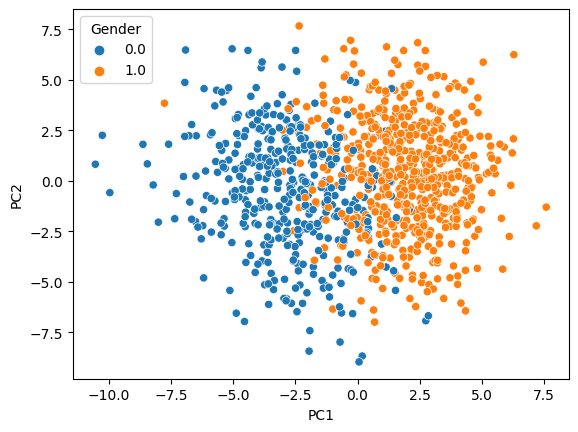

In [ ]:
labels = pd.DataFrame(data=datosResponsesLimpios.Gender) # Me creas un data set de una columna (Gender)
#labels = labels.rename(columns={0: 'label'})
df_new = pd.concat([df_new, labels], axis=1, join="inner")


print(df_new.columns)
# PC7PC10, PC8PC9, PC4PC7, PC2PC9, PC3PC9, PC4PC9, PC7PC10, PC7PC9, PC7PC4,

sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=df_new)

In [ ]:
df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gender
0,-1.338975,-0.684086,1.361538,-4.637964,0.181135,-1.124362,0.874900,2.278169,-1.723283,-0.775079,1
1,2.401586,-2.240078,-1.530341,0.230806,1.717598,1.277863,0.019388,3.842535,-1.471390,1.099471,1
2,-1.928219,2.951864,-2.695195,0.979674,3.567944,-0.818058,0.791550,-1.274226,-1.327892,-1.293574,1
4,3.463875,2.153627,-2.158582,0.353189,0.879160,-1.122210,0.761481,0.608442,0.708337,0.002215,1
5,-3.320547,0.986425,2.136393,-4.752556,0.008489,0.387088,3.717304,1.771532,0.544363,0.513678,0
...,...,...,...,...,...,...,...,...,...,...,...
667,-0.929002,-2.653240,4.293678,-1.346743,1.005299,0.379473,-0.654289,1.304146,0.966950,0.029756,0
670,-3.018952,0.447067,1.005136,2.784819,2.861462,-0.644034,0.193016,0.122390,-1.423822,0.202210,1
671,0.696299,-6.474593,-4.686090,0.894345,0.290396,-0.547450,-0.025047,3.630788,-2.764153,-1.641056,1
672,-3.075351,-1.022022,0.127424,2.155964,0.272054,0.223792,-0.409530,0.975053,-0.474938,-0.575297,1
